In [54]:
import tensorflow as tf
tf.__version__

'1.8.0'

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import plot_model

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [56]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [57]:
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))
# input shape(tuple) or input dim(scalar)

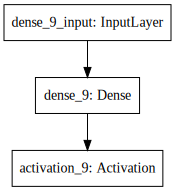

In [58]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Simple MLP (w/ MNIST)

In [91]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

In [97]:
from keras.utils import *

In [93]:
# load MNIST Dataset
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [99]:
num_classes = 10
batch_size = 128
epochs = 20

In [94]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


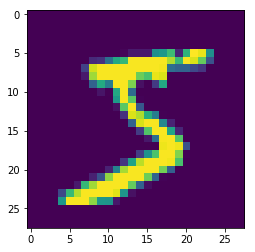

In [95]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])
plt.show()

In [96]:
## reshape
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape, 'train_samples')
print(X_test.shape, 'test_samples')

(60000, 784) train_samples
(10000, 784) test_samples


In [100]:
## to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


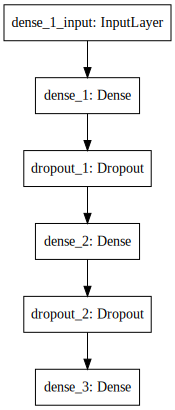

In [194]:
## Build model
model = Sequential()
model.add(Dense(512, activation='relu',input_dim=784,name='dense_1'))
model.add(Dropout(0.2,name='dropout_1'))
model.add(Dense(512, activation='relu', name='dense_2'))
model.add(Dropout(0.2, name='dropout_2'))
model.add(Dense(num_classes, activation='softmax',name='dense_3'))
model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [195]:
model.compile(loss = 'categorical_crossentropy'
             , optimizer = 'Adam'
             , metrics=['accuracy'])

In [196]:
# 첫 번쨰 layer의 weight(x bias)
model.layers[0].get_weights()[0]

array([[ 0.04621556, -0.02110846, -0.03000028, ..., -0.0014087 ,
        -0.03222702, -0.05627839],
       [-0.00873602,  0.06016582, -0.04090793, ...,  0.05775577,
         0.06407796,  0.04286247],
       [-0.05298364,  0.03592812, -0.06130879, ...,  0.0445314 ,
        -0.05270494,  0.05167821],
       ...,
       [ 0.0482565 , -0.03733456, -0.04782663, ...,  0.00275848,
        -0.0137712 ,  0.01141674],
       [ 0.05172644, -0.00275373,  0.00671086, ..., -0.06772153,
        -0.06341852, -0.0149547 ],
       [ 0.00662025, -0.04968843,  0.05945256, ..., -0.04858862,
        -0.02858078,  0.04948429]], dtype=float32)

In [197]:
res = model.fit(X_train, y_train,
               batch_size = batch_size,
               epochs = epochs,
               verbose=1,
               validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.2489 - acc: 0.9240 - val_loss: 0.1061 - val_acc: 0.9663
Epoch 2/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1003 - acc: 0.9697 - val_loss: 0.0816 - val_acc: 0.9737
Epoch 3/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0715 - acc: 0.9782 - val_loss: 0.0775 - val_acc: 0.9758
Epoch 4/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0559 - acc: 0.9821 - val_loss: 0.0700 - val_acc: 0.9802
Epoch 5/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0478 - acc: 0.9839 - val_loss: 0.0711 - val_acc: 0.9794
Epoch 6/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0392 - acc: 0.9870 - val_loss: 0.0698 - val_acc: 0.9790
Epoch 7/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0366 - acc: 0.9880 - val_loss: 0.0624 - val_acc

In [198]:
# Model 결과 (history : metrics)
res.history

{'acc': [0.9240166666348775,
  0.9696666666984558,
  0.9782166666348775,
  0.9821333333015442,
  0.9839166666348775,
  0.9869666666666667,
  0.9880166666348775,
  0.9897666666984558,
  0.9902000000317891,
  0.9918833333651225,
  0.9920333333015442,
  0.9923833333333333,
  0.9931,
  0.9944,
  0.9937333333333334,
  0.9937333333333334,
  0.9945333333333334,
  0.9941333333333333,
  0.9944833333651225,
  0.9955333333015441],
 'loss': [0.24894167420069377,
  0.10025858306884766,
  0.07153521202206611,
  0.055908729360500974,
  0.04782872779270013,
  0.039204703017075855,
  0.0366422012227277,
  0.031016648501654465,
  0.029819813815380136,
  0.024542218718429407,
  0.024124847481710215,
  0.022358436340404055,
  0.020813060120803615,
  0.017186114001708726,
  0.019863013024395332,
  0.019495003087678923,
  0.017023004844971,
  0.017547558535293988,
  0.016599133456358686,
  0.013758659352191413],
 'val_acc': [0.9663,
  0.9737,
  0.9758,
  0.9802,
  0.9794,
  0.979,
  0.9823,
  0.9821,
  0.98

In [199]:
## Params
res.params

{'batch_size': 128,
 'do_validation': True,
 'epochs': 20,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 60000,
 'steps': None,
 'verbose': 1}

In [200]:
## Layers
res.model.layers
res_ly = res.model.layers

In [201]:
first_ly = res_ly[0]
print(first_ly.name)
print(first_ly.activation)
print(first_ly.batch_input_shape)
print(first_ly.bias)
print(first_ly.count_params())
print(first_ly.weights)

dense_1
<function relu at 0x11d9fdae8>
(None, 784)
<tf.Variable 'dense_1_5/bias:0' shape=(512,) dtype=float32_ref>
401920
[<tf.Variable 'dense_1_5/kernel:0' shape=(784, 512) dtype=float32_ref>, <tf.Variable 'dense_1_5/bias:0' shape=(512,) dtype=float32_ref>]


In [202]:
# weight shape
print(first_ly.weights[0])
print(first_ly.weights[1])

# weight value
weights_v = first_ly.get_weights()
len(weights_v)

print(weights_v[0].shape)
print(weights_v[1].shape)

<tf.Variable 'dense_1_5/kernel:0' shape=(784, 512) dtype=float32_ref>
<tf.Variable 'dense_1_5/bias:0' shape=(512,) dtype=float32_ref>
(784, 512)
(512,)


In [203]:
weights_v[0]

array([[ 0.04621556, -0.02110846, -0.03000028, ..., -0.0014087 ,
        -0.03222702, -0.05627839],
       [-0.00873602,  0.06016582, -0.04090793, ...,  0.05775577,
         0.06407796,  0.04286247],
       [-0.05298364,  0.03592812, -0.06130879, ...,  0.0445314 ,
        -0.05270494,  0.05167821],
       ...,
       [ 0.0482565 , -0.03733456, -0.04782663, ...,  0.00275848,
        -0.0137712 ,  0.01141674],
       [ 0.05172644, -0.00275373,  0.00671086, ..., -0.06772153,
        -0.06341852, -0.0149547 ],
       [ 0.00662025, -0.04968843,  0.05945256, ..., -0.04858862,
        -0.02858078,  0.04948429]], dtype=float32)

In [204]:
weights_v[1]

array([ 0.04371589, -0.0046547 , -0.0392276 ,  0.01255772, -0.02397783,
       -0.09713282,  0.02757577,  0.00149964, -0.02213456, -0.04731492,
        0.03270873, -0.04173247,  0.06104672, -0.0786675 ,  0.03678183,
        0.11000122, -0.0678976 , -0.05861126, -0.07293461,  0.00218153,
       -0.09284561, -0.00369348,  0.03394573, -0.04165057, -0.02198814,
       -0.12971294, -0.05209419,  0.028779  , -0.04944964, -0.11905868,
        0.07203943, -0.04626541,  0.01479631, -0.01610629, -0.06355337,
       -0.0346344 , -0.00728399, -0.06679263, -0.03864677,  0.01902954,
       -0.07042599, -0.01233298,  0.00765371,  0.04000694, -0.05626161,
       -0.01035011, -0.04735115, -0.01133995,  0.044623  ,  0.08885787,
       -0.11188385,  0.01205097,  0.00708321,  0.07003018,  0.01869654,
       -0.07144172,  0.12071086, -0.03557108, -0.00135435,  0.02627079,
       -0.04195372, -0.01572539, -0.0264308 , -0.03817488,  0.04699501,
       -0.06000495,  0.01139446,  0.01573059,  0.05905631,  0.05

In [205]:
weights_v[0].shape

(784, 512)

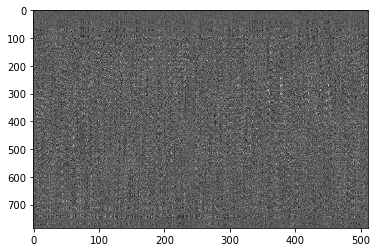

In [209]:
from matplotlib import pyplot as plt
plt.imshow(weights_v[0], cmap=plt.cm.binary, aspect='auto')
plt.show()

In [213]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss :', scores[0])
print('Test Acc :', scores[1])

Test loss : 0.07991094253013038
Test Acc : 0.9832


In [214]:
pred_res = model.predict_proba(X_test)

In [221]:
pred_res[0]

array([3.2324876e-15, 2.1145264e-11, 4.2995842e-16, 1.8887628e-10,
       5.9045447e-15, 5.7874509e-14, 1.8239907e-18, 9.9999988e-01,
       2.0603838e-12, 8.3519048e-08], dtype=float32)